# EDA: Exploratory Data Analysis，探索性数据分析

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"train shape: {train.shape}, test shape: {test.shape}")

train shape: (1460, 81), test shape: (1459, 80)


In [3]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0],
                  train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values',
                                        'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
25,MasVnrType,3,59.726027,59.726027,object
...,...,...,...,...,...
27,ExterQual,4,0.000000,62.054795,object
24,Exterior2nd,16,0.000000,34.520548,object
23,Exterior1st,15,0.000000,35.273973,object
22,RoofMatl,8,0.000000,98.219178,object


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


def describe_and_visualize(df, table_name):
    print("\n[log] -------------------- \n")
    print(f"分析表格：{table_name}")
    print(f"表格的形状：{df.shape}")

    categorical_columns = []  # 类别型字段
    numerical_columns = []  # 数值型字段

    # 分类字段与数值字段区分
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() < 30:  # 类别型或唯一值较少
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)

    # 输出类别型字段的信息
    print(f"\n>>> 类别型字段（{len(categorical_columns)} 个）：{categorical_columns}")
    for column in categorical_columns:
        print(f"字段：{column}")
        print(f"{column}是类别型数据，共有{df[column].nunique()}个不同的值")
        print(df[column].value_counts())

    # 绘制类别型字段的条形图
    if categorical_columns:
        print("\n[log] 正在绘制类别型字段的统计图...")
        rows = math.ceil(len(categorical_columns) / 4)
        fig, axes = plt.subplots(rows, min(len(categorical_columns), 4), figsize=(20, 5 * rows))
        axes = axes.flatten()  # 展平方便处理
        for i, column in enumerate(categorical_columns):
            df[column].value_counts().plot(kind='bar', ax=axes[i], title=f'{column} - Count Values')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        # 隐藏多余的子图
        for j in range(len(categorical_columns), len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    # 输出数值型字段的信息
    print(f"\n>>> 数值型字段（{len(numerical_columns)} 个）：{numerical_columns}")
    for column in numerical_columns:
        print(f"\n字段：{column}")
        print(f"{column}是数值型数据，共有{df[column].nunique()}个不同的值")
        print(df[column].describe())

    # 绘制数值型字段的分布图
    if numerical_columns:
        print("\n[log] 正在绘制数值型字段的分布图...")
        rows = math.ceil(len(numerical_columns) / 4)
        fig, axes = plt.subplots(rows, min(len(numerical_columns), 4), figsize=(20, 5 * rows))
        axes = axes.flatten()  # 展平方便处理
        for i, column in enumerate(numerical_columns):
            sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
            axes[i].set_title(f'{column} - Distribution')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        # 隐藏多余的子图
        for j in range(len(numerical_columns), len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()


[log] -------------------- 

分析表格：train
表格的形状：(1460, 81)

>>> 类别型字段（61 个）：['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
字段：MSSubClass
MSSubClass是类别型数据，共有15个不同的值
MSSubClass
20     536
60     299
50     144
120     87
3

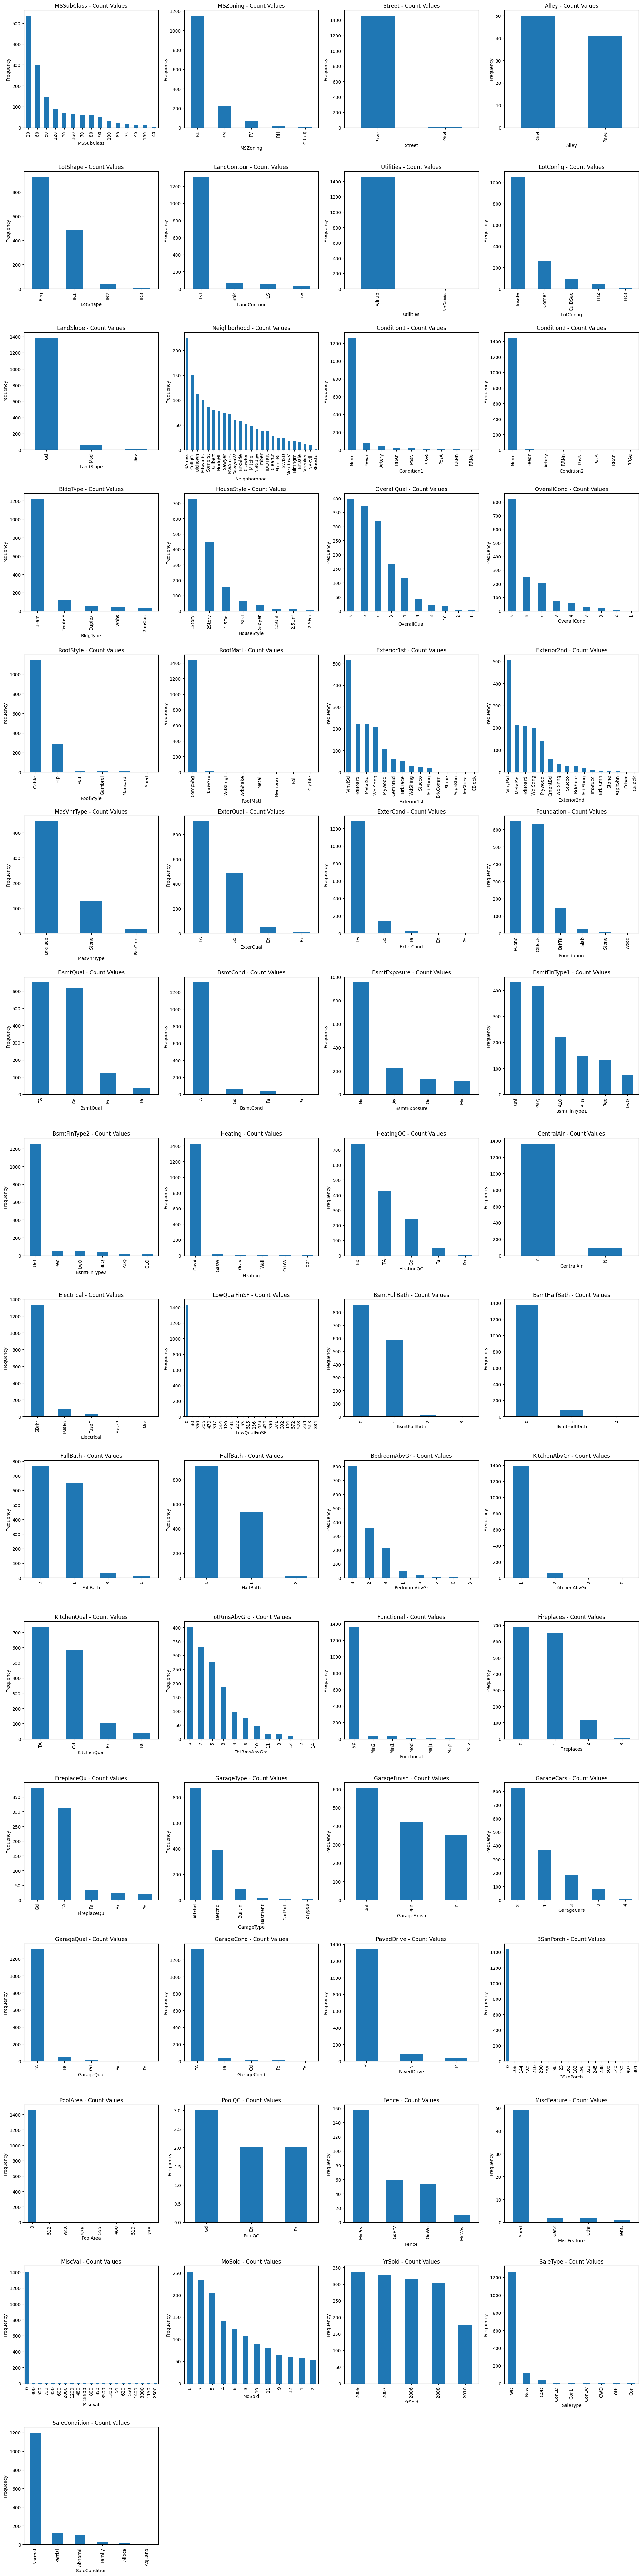


>>> 数值型字段（20 个）：['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

字段：Id
Id是数值型数据，共有1460个不同的值
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

字段：LotFrontage
LotFrontage是数值型数据，共有110个不同的值
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

字段：LotArea
LotArea是数值型数据，共有1073个不同的值
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype:

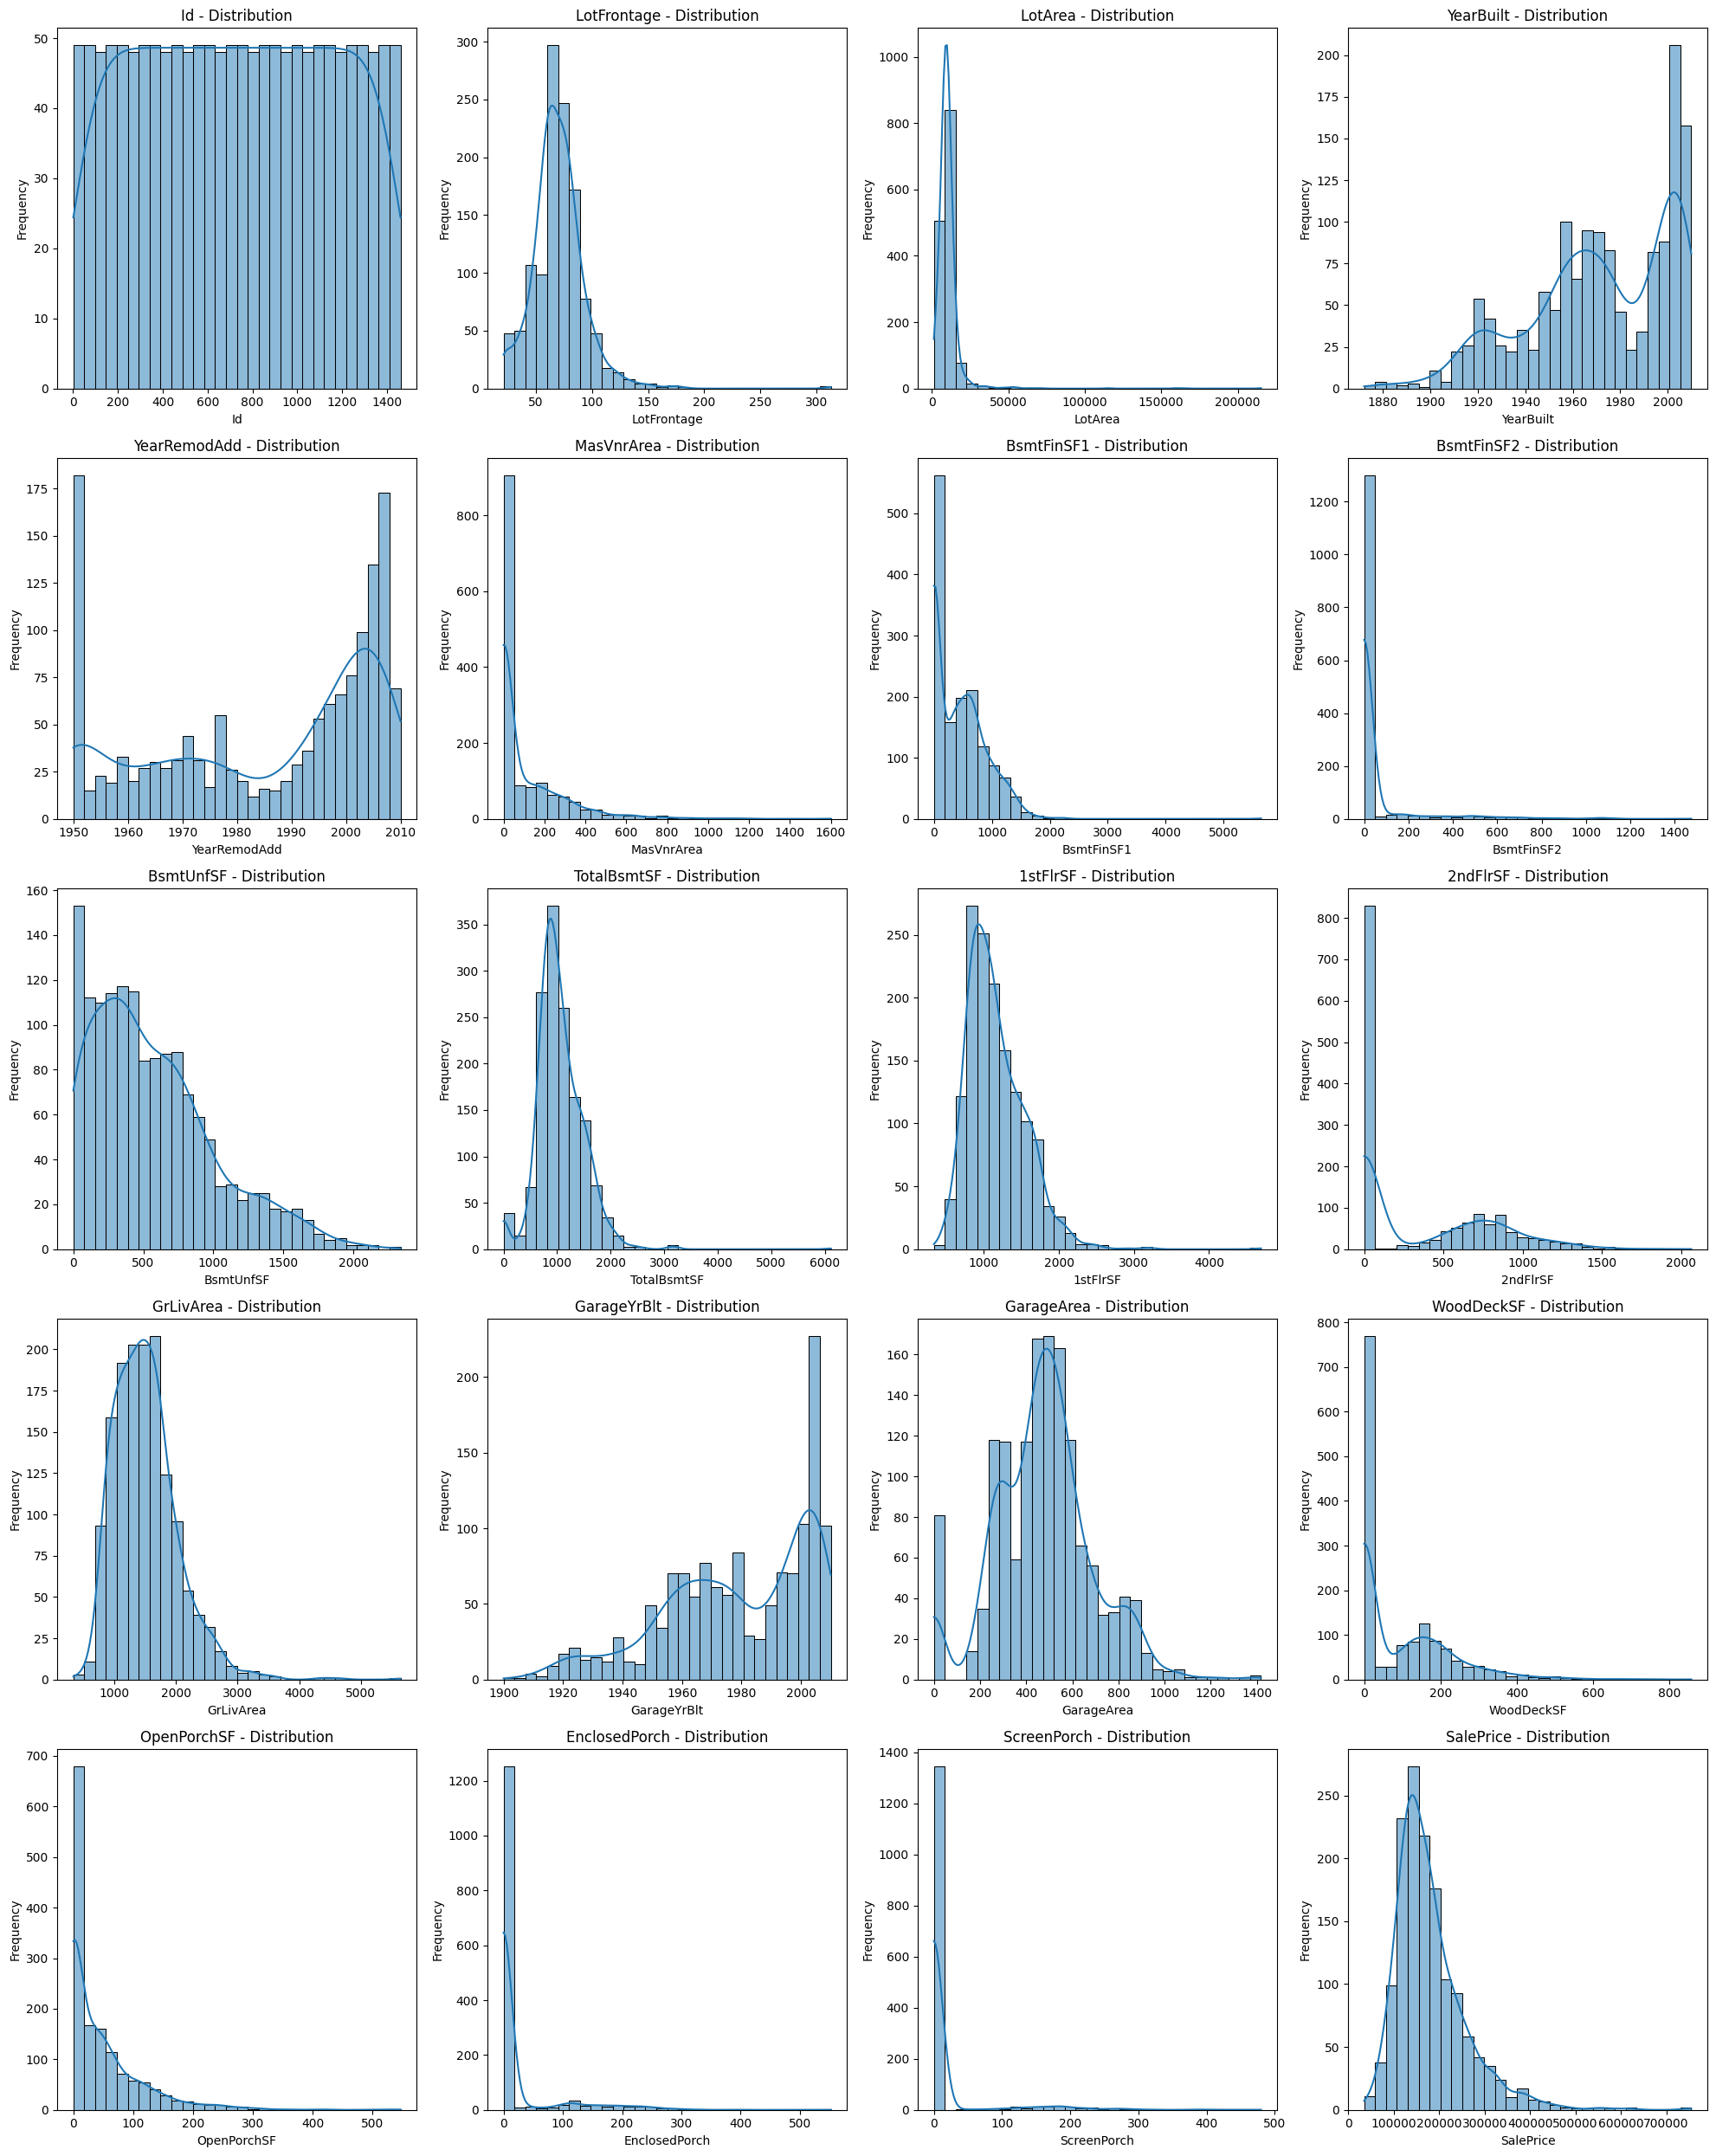

In [5]:
describe_and_visualize(train, 'train')

#### 1.1.2.2 了解特征——使用均值提交

In [8]:
sales_mean = train['SalePrice'].mean()
print(f"SalePrice的均值：{sales_mean}")
test_preds = np.full(test.shape[0], sales_mean)
submission = pd.DataFrame({
    'Id': test['Id'],  # 保持测试集的ID列
    'SalePrice': test_preds  # 预测的结果列
})
submission.to_csv("output/EDA/submission_mean.csv", index=False)

SalePrice的均值：180921.19589041095


In [2]:
skewness = train['SalePrice'].skew()
print("Skewness:", skewness)

Skewness: 1.8828757597682129


In [13]:
import numpy as np

# 进行对数变换
train['SalePrice_log'] = np.log1p(train['SalePrice'])

# 检查变换后的偏态系数
skewness_log = train['SalePrice_log'].skew()
print("Log-transformed skewness:", skewness_log)
train.drop('SalePrice_log', axis=1, inplace=True)


Log-transformed skewness: 0.12134661989685333


In [14]:
train['SalePrice_sqrt'] = np.sqrt(train['SalePrice'])

# 检查变换后的偏态系数
skewness_sqrt = train['SalePrice_sqrt'].skew()
print("Square-root transformed skewness:", skewness_sqrt)
train.drop('SalePrice_sqrt', axis=1, inplace=True)


Square-root transformed skewness: 0.9431527373310963


In [15]:
from scipy import stats

# Box-Cox变换需要所有数据大于零
train['SalePrice_boxcox'], lambda_value = stats.boxcox(train['SalePrice'])
print("Box-Cox transformed skewness:", train['SalePrice_boxcox'].skew())
print("Optimal lambda value:", lambda_value)

# Box-Cox变换会自动寻找一个最优的lambda值来对数据进行变换，使得变换后的数据分布尽可能接近正态分布。在这里，lambda值为**-0.0769**，表示变换采用了负的lambda值。
train.drop('SalePrice_boxcox', axis=1, inplace=True)

Box-Cox transformed skewness: -0.008652893640830838
Optimal lambda value: -0.07692391328663316


In [16]:
train['SalePrice_reciprocal'] = 1 / train['SalePrice']

# 检查变换后的偏态系数
skewness_reciprocal = train['SalePrice_reciprocal'].skew()
print("Reciprocal transformed skewness:", skewness_reciprocal)

train.drop('SalePrice_reciprocal', axis=1, inplace=True)


Reciprocal transformed skewness: 2.142121472065559


<Axes: >

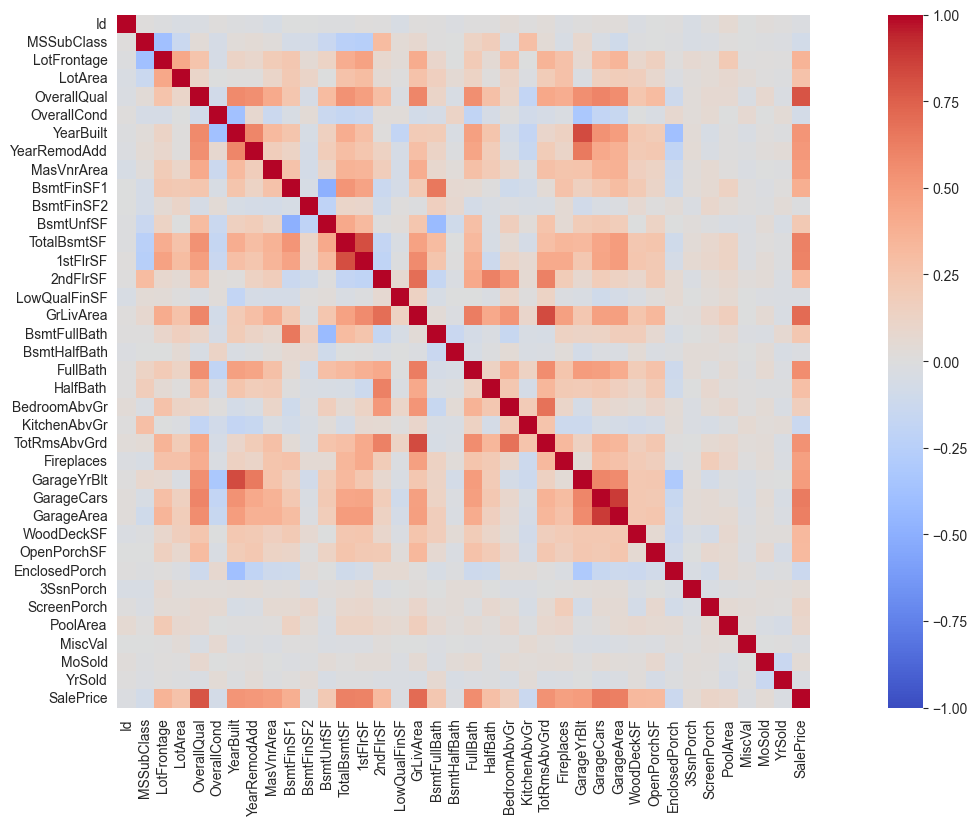

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

train_num = train.select_dtypes(include=[np.number])
corrmat = train_num.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, square=True, cmap='coolwarm', vmin=-1, vmax=1)  # square=True 参数的作用是确保热图中的每个单元格都是正方形


#### 1.1.2.4 多变量分析

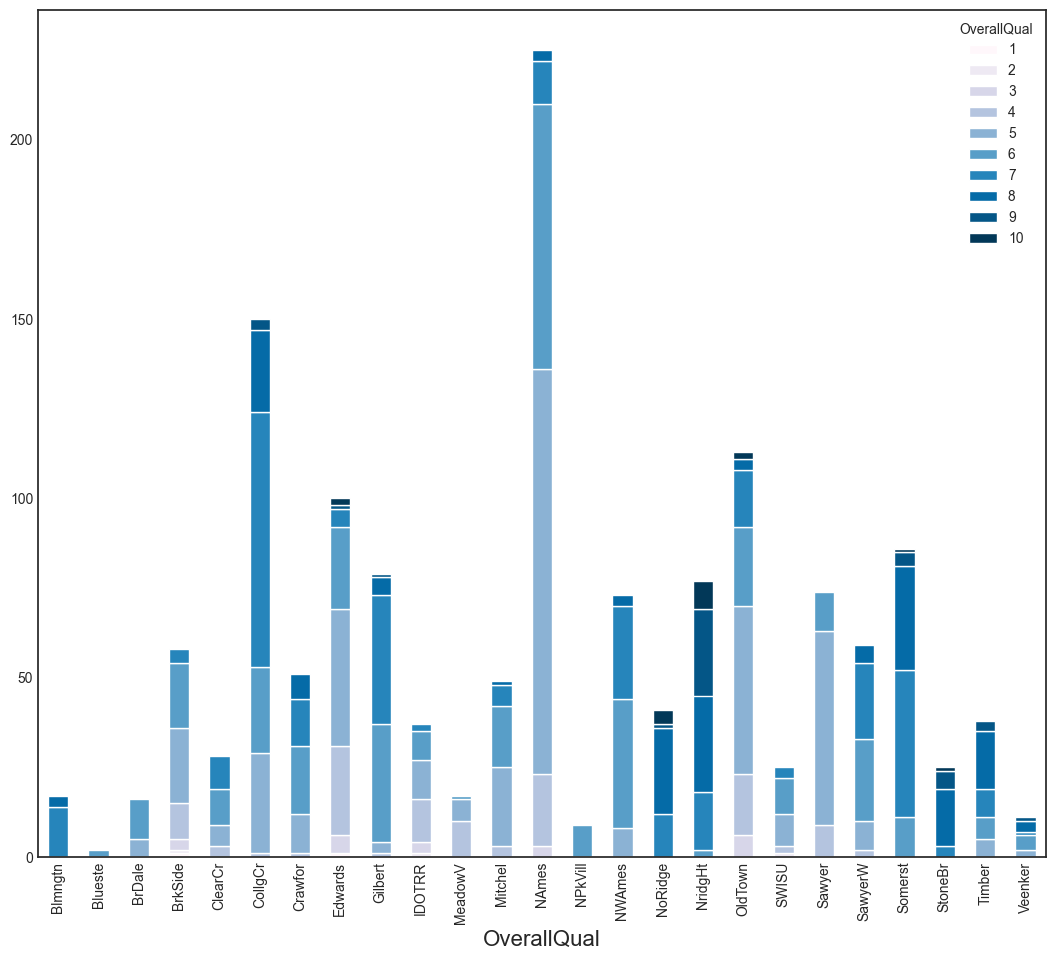

In [19]:
sns.set_style('white')
type_cluster = train.groupby(['Neighborhood', 'OverallQual']).size()
type_cluster.unstack().plot(kind='bar', stacked=True, colormap='PuBu', figsize=(13, 11), grid=False)
plt.xlabel('OverallQual', fontsize=16)
plt.show()

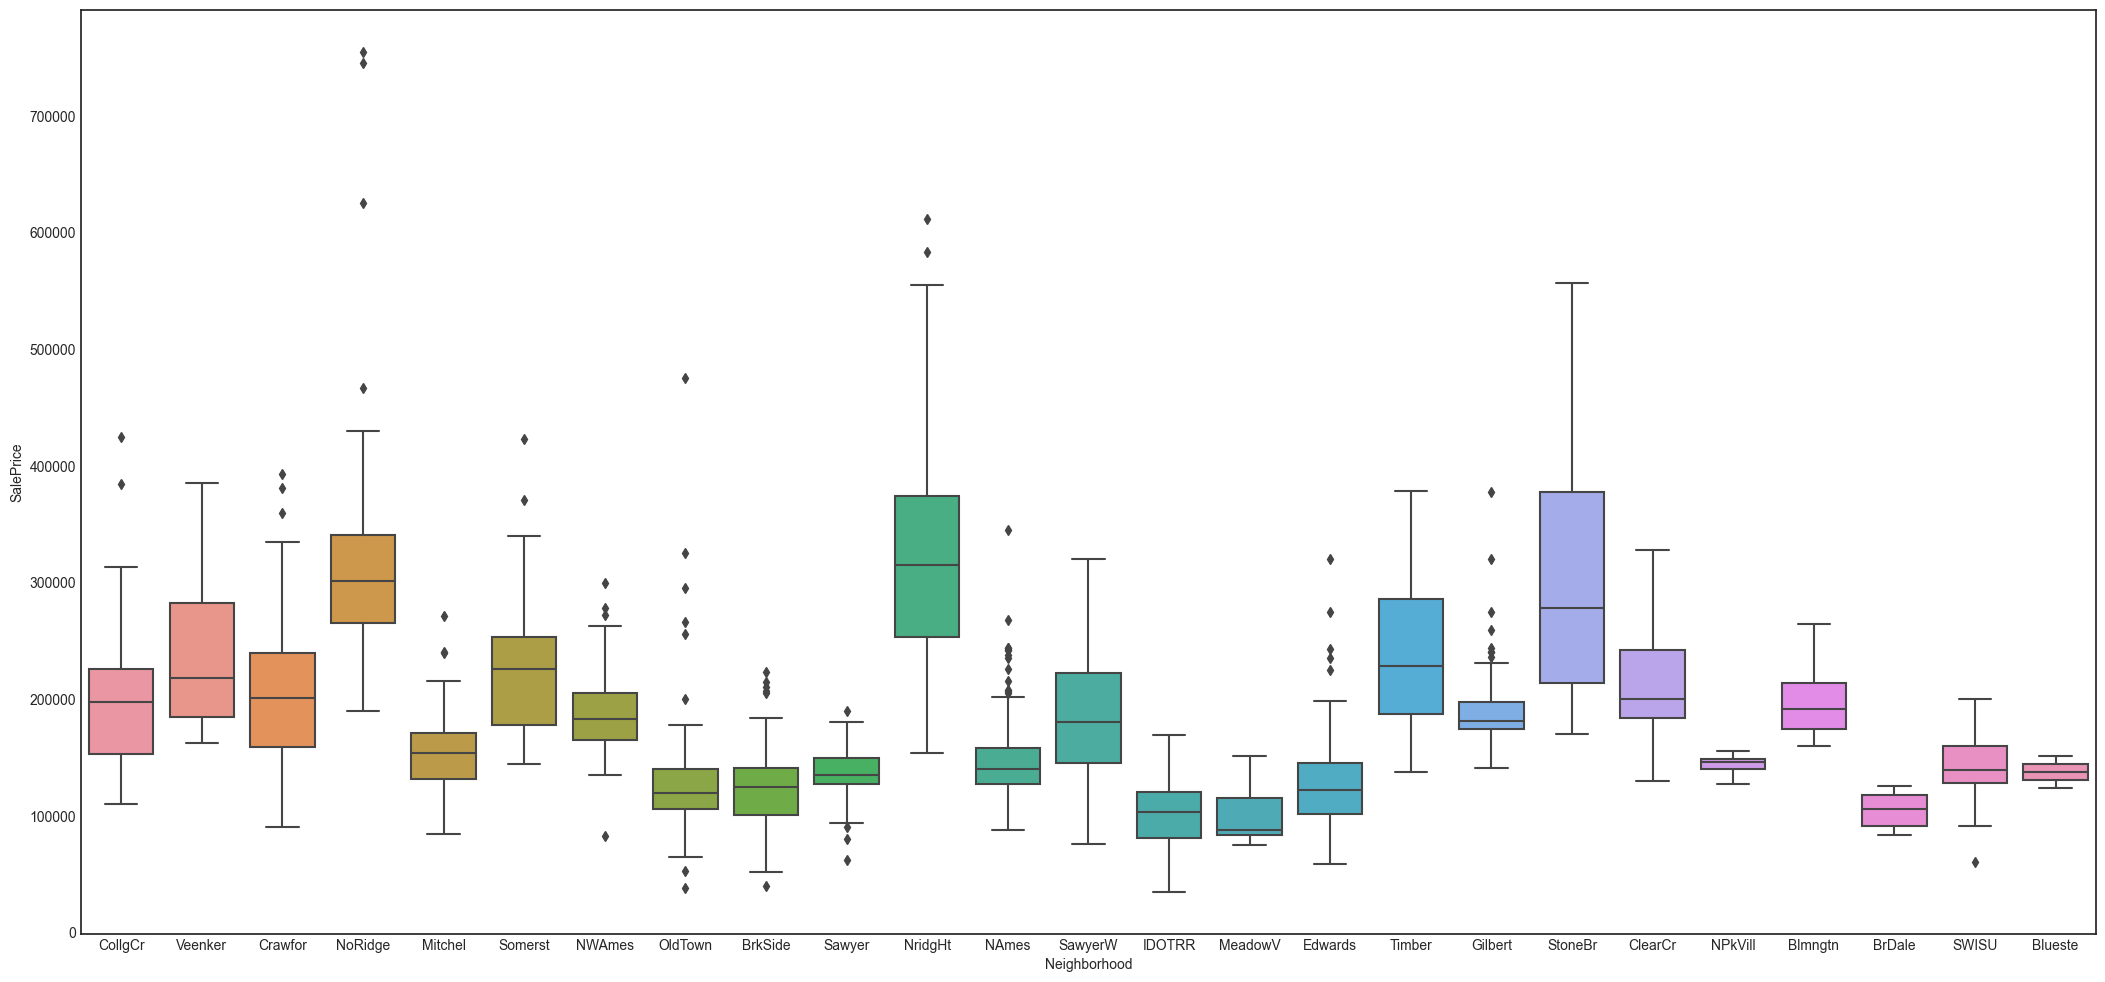

In [22]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.show()


#### 1.1.2.5 Ridge回归与Lasso回归

In [24]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


# 计算 RMSE 的交叉验证函数
def rmse_cv(model, X, y):
    """通过交叉验证计算模型的 RMSE"""
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse


# 数据预处理：合并数据，处理类别变量，填充缺失值
all_data = pd.concat([train, test], ignore_index=True)
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
print(f"all_data shape: {all_data.shape}")

# 切分数据
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train['SalePrice']

model_ridge = Ridge()

all_data shape: (2919, 289)


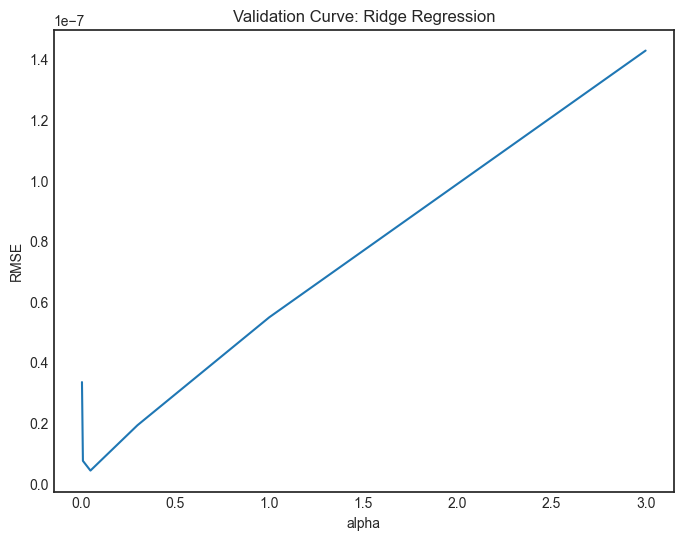

0.005    3.337439e-08
0.010    7.375521e-09
0.050    4.166580e-09
0.100    7.171961e-09
0.300    1.914426e-08
1.000    5.475876e-08
3.000    1.428112e-07
dtype: float64

In [52]:
# Ridge 回归：超参数选择与绘图
def ridge_model_selection(X, y, alphas):
    """选择 Ridge 回归的最优正则化参数"""
    cv_ridge = [rmse_cv(Ridge(alpha=alpha), X, y).mean() for alpha in alphas]
    cv_ridge = pd.Series(cv_ridge, index=alphas)

    # 绘制验证曲线
    plt.figure(figsize=(8, 6))
    cv_ridge.plot(title="Validation Curve: Ridge Regression")
    plt.xlabel("alpha")
    plt.ylabel("RMSE")
    plt.show()

    return cv_ridge


alphas = [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3]
ridge_model_selection(X_train, y_train, alphas)
# 观察可知，alpha=0.05 是一个合适的选择。Ridge 回归的强正则化适用于特征较多、共线性较高的情况。

In [61]:
# Lasso 模型训练与特征选择
def train_lasso(X, y, alphas):
    """训练 Lasso 模型并分析特征重要性"""
    model_lasso = LassoCV(alphas=alphas).fit(X, y)
    print(f"Lasso RMSE: {rmse_cv(model_lasso, X, y).mean()}")
    # 输出最优的 alpha 值
    print(f"Optimal alpha: {model_lasso.alpha_}")

    # 提取特征系数
    coef = pd.Series(model_lasso.coef_, index=X.columns)
    print(f"Lasso picked {sum(coef != 0)} variables ")
    print(f"Lasso eliminated {sum(coef == 0)} variables")
    print(f"coef < 0.01: {sum(abs(coef) < 0.01)}")

    return model_lasso, coef


model_lasso, coef = train_lasso(X_train, y_train, alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 1])

Lasso RMSE: 519.0182720837938
Optimal alpha: 0.001
Lasso picked 250 variables 
Lasso eliminated 39 variables
coef < 0.01: 53


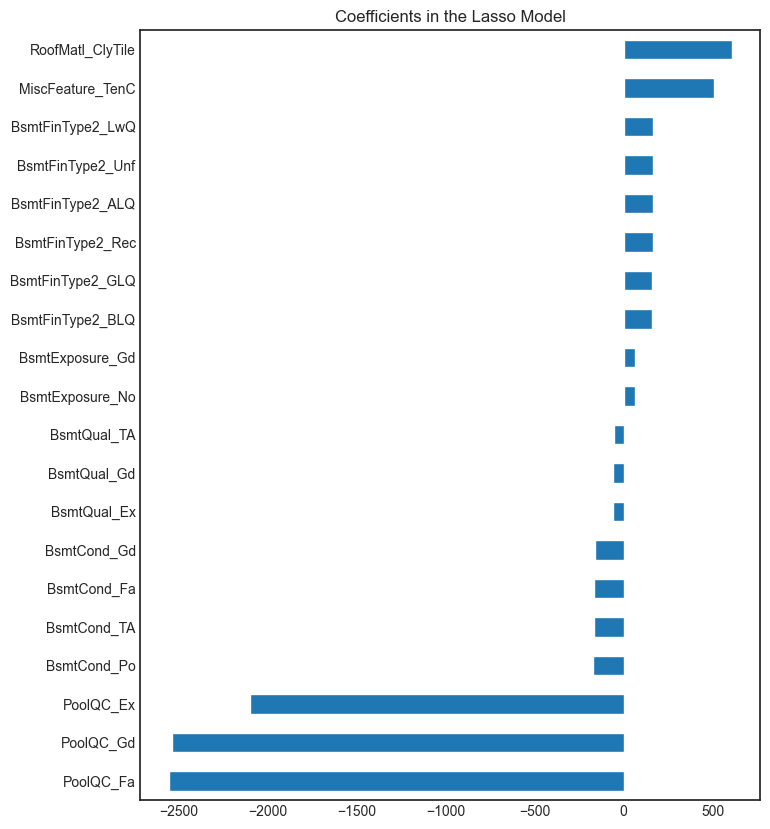

PoolQC_Fa          -2554.745510
PoolQC_Gd          -2534.212061
PoolQC_Ex          -2098.442326
BsmtCond_Po         -172.446510
BsmtCond_TA         -164.894048
                       ...     
BsmtFinType2_ALQ     162.055647
BsmtFinType2_Unf     162.642752
BsmtFinType2_LwQ     164.648073
MiscFeature_TenC     509.654928
RoofMatl_ClyTile     609.759824
Length: 289, dtype: float64

In [59]:
import matplotlib
import matplotlib.pyplot as plt


# 特征重要性可视化
def plot_lasso_coefficients(coef):
    """可视化 Lasso 模型的特征重要性"""
    imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind="barh")
    plt.title("Coefficients in the Lasso Model")
    plt.show()
    return coef.sort_values()


plot_lasso_coefficients(coef)

Lasso RMSE: 36249.801587616836
Optimal alpha: 0.01
Lasso picked 37 variables 
Lasso eliminated 0 variables
coef < 0.01: 0


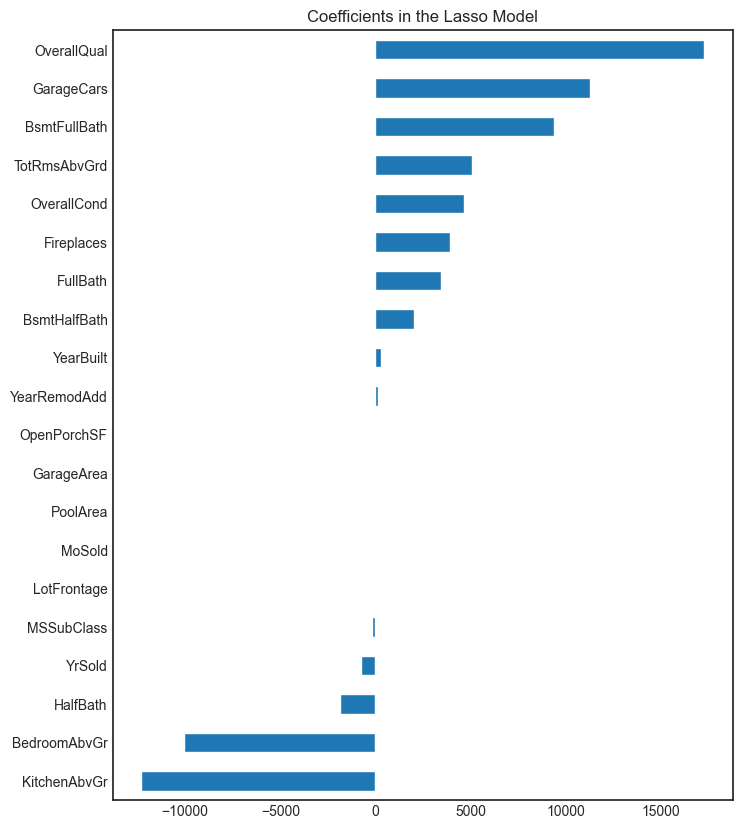

KitchenAbvGr    -12332.702912
BedroomAbvGr    -10080.896516
HalfBath         -1872.495268
YrSold            -776.394270
MSSubClass        -181.211591
LotFrontage        -56.597294
MoSold             -45.224344
PoolArea           -28.335769
GarageArea          -4.200496
OpenPorchSF         -2.910416
Id                  -1.077850
MiscVal             -0.736388
LotArea              0.428299
TotalBsmtSF          3.517409
BsmtFinSF2           4.690019
GrLivArea            5.326744
BsmtUnfSF            5.749819
EnclosedPorch       11.787993
BsmtFinSF1          15.639180
LowQualFinSF        19.695256
3SsnPorch           19.747820
WoodDeckSF          23.869845
MasVnrArea          31.298927
2ndFlrSF            43.630832
1stFlrSF            43.727510
ScreenPorch         55.964855
GarageYrBlt        122.168620
YearRemodAdd       134.952730
YearBuilt          271.367552
BsmtHalfBath      2005.219069
FullBath          3460.422564
Fireplaces        3947.920115
OverallCond       4680.369672
TotRmsAbvG

In [67]:
train_num.fillna(train_num.mean(), inplace=True)
model_lasso, coef = train_lasso(train_num, y_train, alphas=[0.01, 0.05, 0.1, 0.3, 1])
plot_lasso_coefficients(coef)


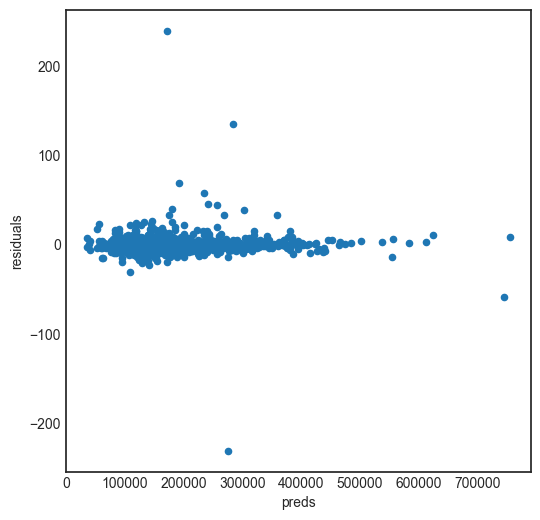

In [41]:
# 接下来观察真实结果与预测结果的残差
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_lasso.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x="preds", y="residuals", kind="scatter")
train = pd.concat([train, preds], axis=1)


#### （补充）目标值编码

In [10]:
import pandas as pd
from sklearn.model_selection import KFold

# 查看原始数据中的 MSZoning 和目标值 SalePrice
print("原始数据：")
print(train[['MSZoning', 'SalePrice']].head(20))

# 初始化新的列，用于存储编码后的结果
train['MSZoning_TargetEncoded'] = 0

# 准备五折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 目标值编码
for train_idx, val_idx in kf.split(train):
    # 训练集和验证集划分
    train_fold, val_fold = train.iloc[train_idx], train.iloc[val_idx]

    # 计算训练集中每个类别的目标均值
    target_mean = train_fold.groupby('MSZoning')['SalePrice'].mean()

    # 用训练集的均值对验证集进行编码
    train.loc[val_idx, 'MSZoning_TargetEncoded'] = val_fold['MSZoning'].map(target_mean)

# 展示编码后的结果
print("\n编码后的数据：")
print(train[['MSZoning', 'MSZoning_TargetEncoded', 'SalePrice']].head(20))
print("\n按类别查看编码后的数据：")
print(train[['MSZoning', 'MSZoning_TargetEncoded']].drop_duplicates())


# 计算整个训练集的目标均值，用于测试集编码
global_target_mean = train.groupby('MSZoning')['SalePrice'].mean()

# 用类别均值对测试集进行编码
test['MSZoning_TargetEncoded'] = test['MSZoning'].map(global_target_mean)

# 处理测试集中未知类别（用训练集中目标值的全局均值填充）
overall_mean = train['SalePrice'].mean()
test['MSZoning_TargetEncoded'].fillna(overall_mean, inplace=True)

# 展示编码后的测试集
print("\n按类别查看测试集编码后的数据：")
print(test[['MSZoning', 'MSZoning_TargetEncoded']].drop_duplicates())



原始数据：
   MSZoning  SalePrice
0        RL     208500
1        RL     181500
2        RL     223500
3        RL     140000
4        RL     250000
5        RL     143000
6        RL     307000
7        RL     200000
8        RM     129900
9        RL     118000
10       RL     129500
11       RL     345000
12       RL     144000
13       RL     279500
14       RL     157000
15       RM     132000
16       RL     149000
17       RL      90000
18       RL     159000
19       RL     139000

编码后的数据：
   MSZoning  MSZoning_TargetEncoded  SalePrice
0        RL           191344.810811     208500
1        RL           191907.323465     181500
2        RL           191344.810811     223500
3        RL           191194.986813     140000
4        RL           190259.436227     250000
5        RL           191194.986813     143000
6        RL           191344.810811     307000
7        RL           191344.810811     200000
8        RM           125494.480874     129900
9        RL           191344.810